In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import missingno as msno
import datetime
#import Time Series lib
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('/Users/sultanahaldawsari/Desktop/weatherSA.csv')

In [3]:
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


# Data Exploring and Inspecting

In [4]:
df.shape

(249023, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'city', 'date', 'time', 'year', 'month', 'day', 'hour',
       'minute', 'weather', 'temp', 'wind', 'humidity', 'barometer',
       'visibility'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,year,month,day,hour,minute,temp,wind,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,248951.000000,249023.000000
mean,121690.686174,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,1015.455355,11.053453
std,71831.546649,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,6.970779,7.053005
min,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,904.000000,-1.000000
25%,59402.500000,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,1011.000000,5.000000
50%,121658.000000,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,1016.000000,16.000000
75%,183913.500000,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,1021.000000,16.000000
max,246169.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1101.000000,161.000000


In [8]:
df.isna().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

<AxesSubplot:>

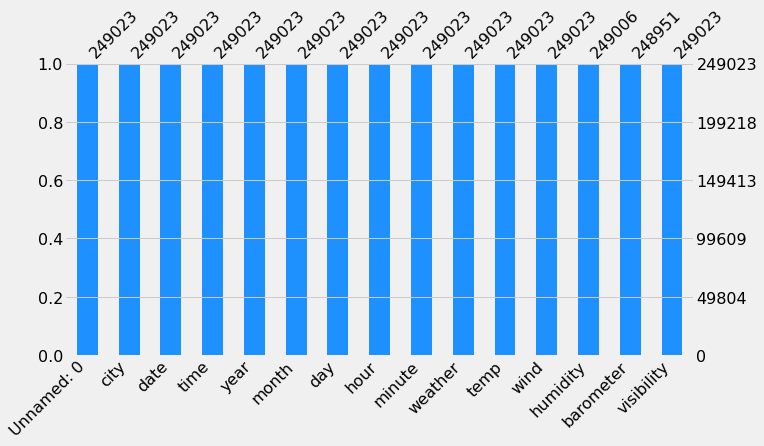

In [9]:
msno.bar(df,color="dodgerblue",figsize=(10,5))

In [10]:
df.duplicated().sum()

0

### Data Cleaning and Feature Extraction

In [11]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [12]:
df.drop(['Unnamed: 0','date','time', 'year', 'month', 'day', 'hour','minute','barometer','visibility'], axis=1,inplace=True)

In [13]:
df.head()

,city,weather,temp,wind,humidity,datetime
0,Qassim,Clear,17,11,64%,2017-01-01 00:00:00
1,Qassim,Clear,17,6,64%,2017-01-01 01:00:00
2,Qassim,Clear,15,11,72%,2017-01-01 03:00:00
3,Qassim,Clear,15,11,72%,2017-01-01 04:00:00
4,Qassim,Clear,15,9,72%,2017-01-01 05:00:00


In [14]:
#delete null values..
df.dropna(inplace=True)

In [15]:
df.isna().sum()

city        0
weather     0
temp        0
wind        0
humidity    0
datetime    0
dtype: int64

In [16]:
#convert humidity to numeric
df['humidity']=df['humidity'].map(lambda x: x.rstrip('%'))

In [17]:
df['humidity'] = df['humidity'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249006 entries, 0 to 249022
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   city      249006 non-null  object        
 1   weather   249006 non-null  object        
 2   temp      249006 non-null  int64         
 3   wind      249006 non-null  int64         
 4   humidity  249006 non-null  int64         
 5   datetime  249006 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 13.3+ MB


In [19]:
#It doesn't seems there're outliers 
df.describe()

,temp,wind,humidity
count,249006.000000,249006.000000,249006.000000
mean,24.722597,12.957101,37.553139
std,8.880556,8.711561,23.593068
min,-4.000000,-1.000000,0.000000
25%,18.000000,7.000000,17.000000
50%,24.000000,11.000000,32.000000
75%,31.000000,19.000000,55.000000
max,50.000000,163.000000,100.000000


In [23]:
df.set_index('datetime',inplace=True)

# Explolarity Data Analysis

Text(0, 0.5, 'Percent')

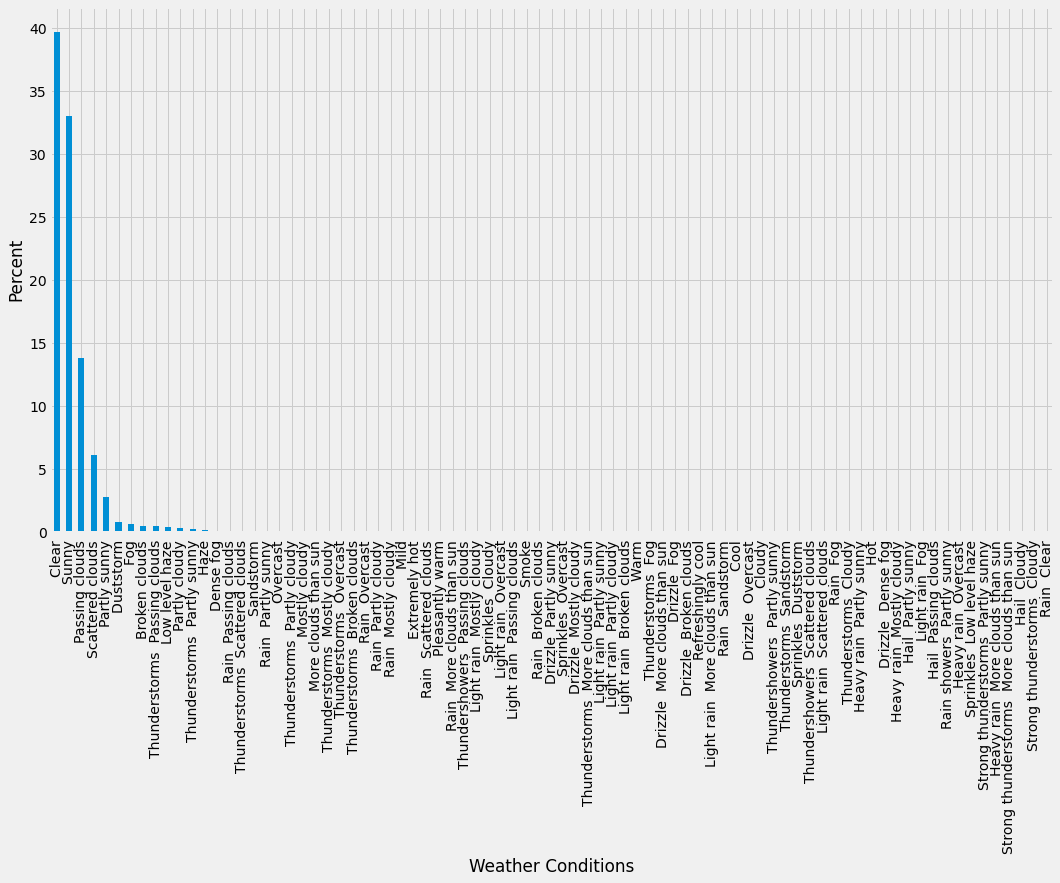

In [24]:
weather_condition = (df.weather.value_counts()/(df.weather.value_counts().sum()))*100
weather_condition.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

#### This Previous plot shows that Saudi Arabia moslty have clear or sunny weather

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

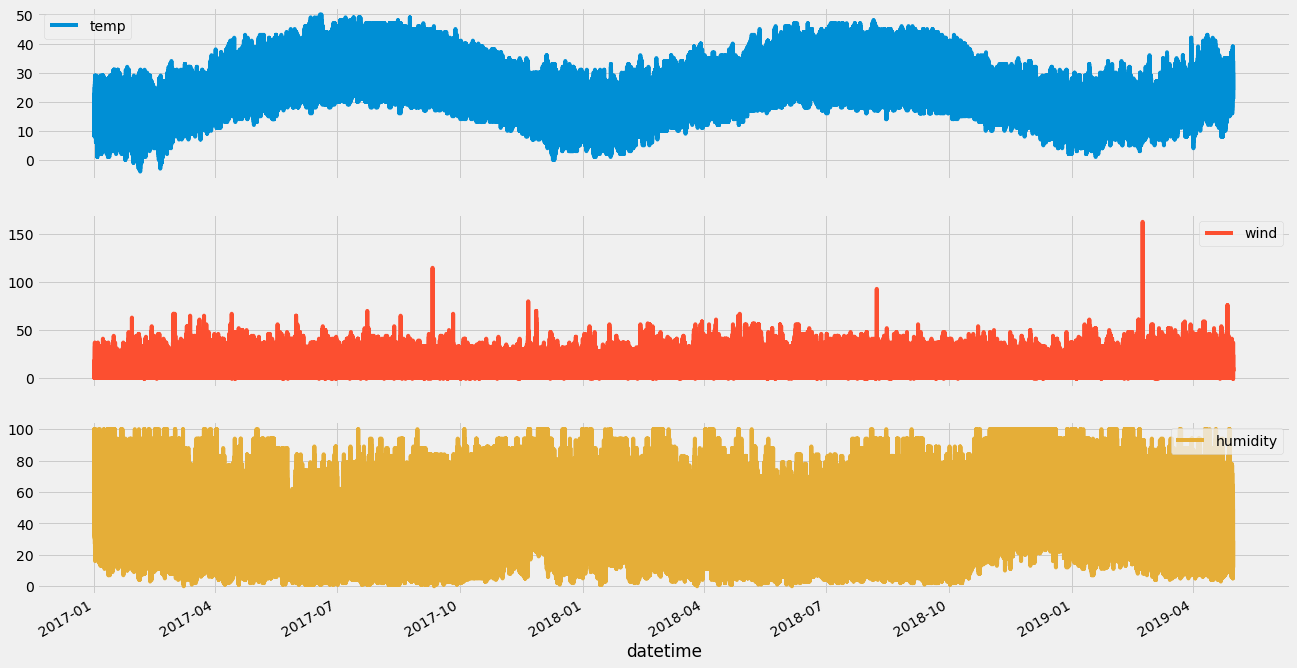

In [25]:
df.plot(subplots=True, figsize=(20,12))
#this plot seems overplotted because data is huge 
#but u can see that during Jan every year the tempreture drops 
#and during Sep and Oct wind seems to be higher than other months 
#humidity varies

In [200]:
#Split data into train and test 
train_df = df['2017':'2018'].resample('M').mean().fillna(method='pad')
train_df.drop(columns='humidity', axis=1, inplace=True)
test_df = df['2019'].resample('M').mean().fillna(method='pad')
test_df.drop(columns='humidity', axis=1, inplace=True)

/var/folders/8g/xnwb819n62n3vzd_bphz159w0000gn/T/ipykernel_15763/2391223337.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test_df = df['2019'].resample('M').mean().fillna(method='pad')


# Check Stationarity

### check if we have 1- constant mean 2- constant variance and 3- covariance that does not depend on time

In [128]:
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic          -3.372082
p-value                  0.011948
Lags Used                8.000000
Observations Used       15.000000
Critical Value (1%)     -3.964443
Critical Value (5%)     -3.084908
Critical Value (10%)    -2.681814
dtype: float64


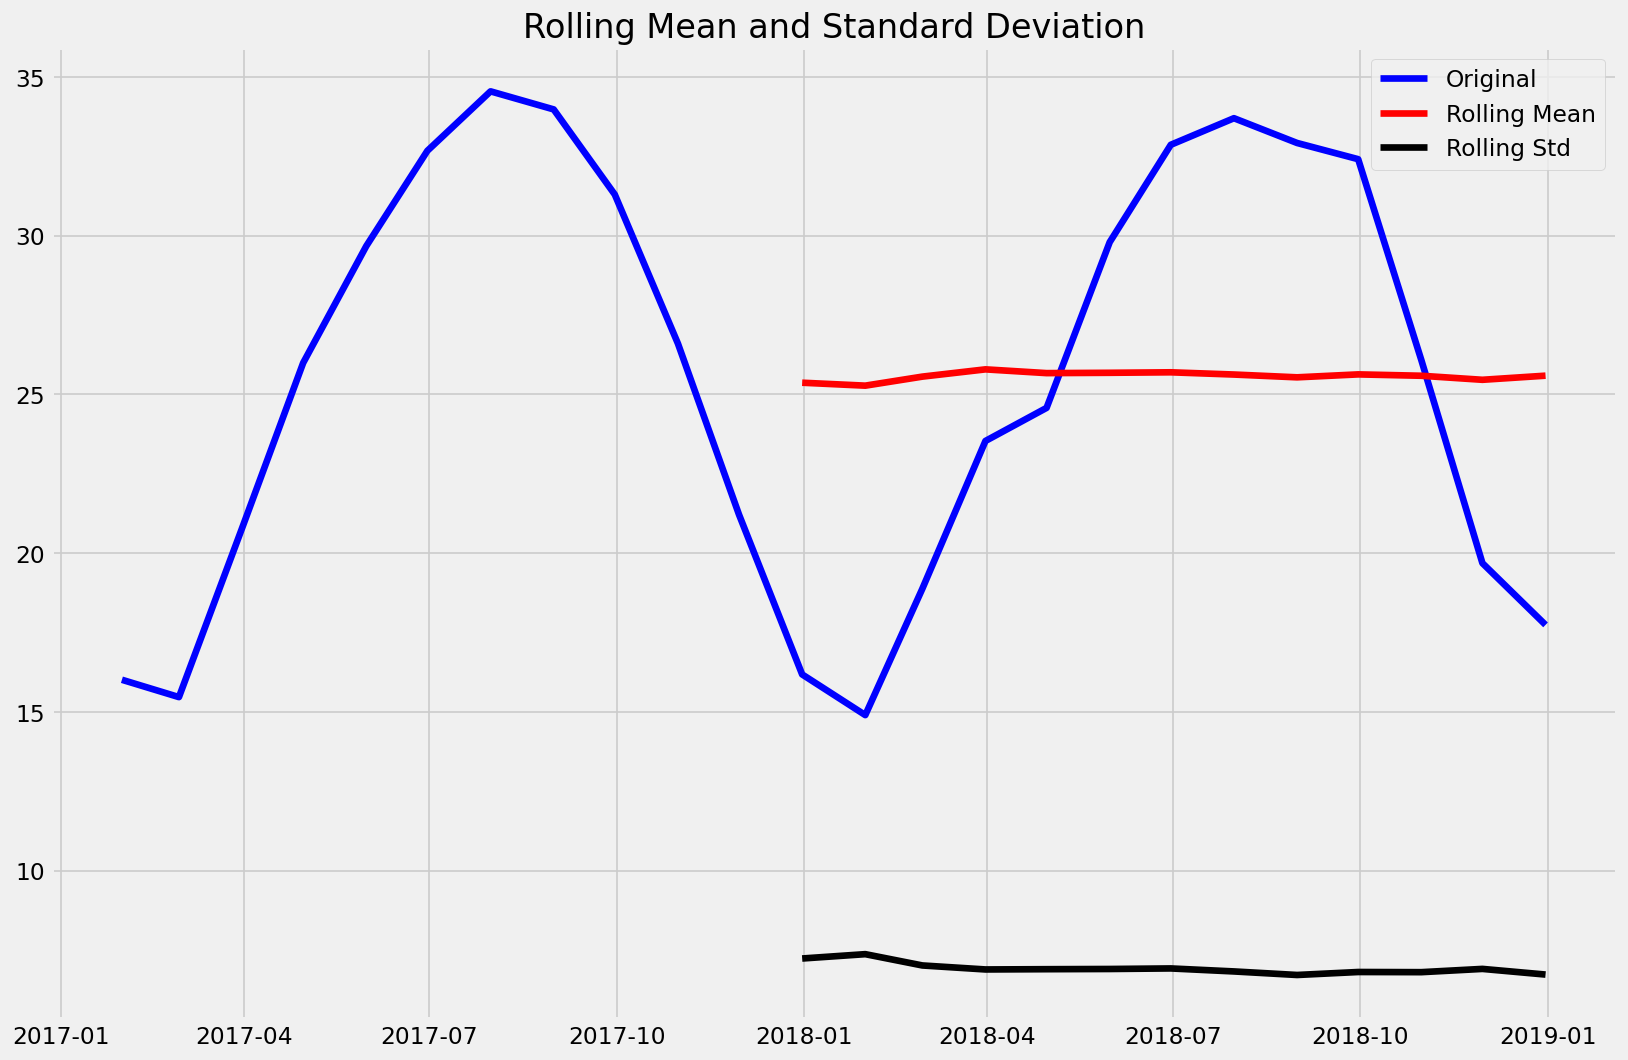

In [129]:
dftest(train_df.temp)
#p-value < 0.05 and Test Statistic< Critical Value, then time series does not have a unit root, meaning it is stationary.
#and also, you can see that we have constant mean and std


# ARIMA Model

In [157]:
model = ARIMA(train_df.temp, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                   24
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -40.684
Date:                Mon, 06 Dec 2021   AIC                             93.367
Time:                        22:13:41   BIC                            100.436
Sample:                    01-31-2017   HQIC                            95.243
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5899      0.048    533.598      0.000      25.496      25.684
ar.L1          1.7228      0.012    146.143      0.000       1.700       1.746
ar.L2         -0.9972      0.005   -187.989      0.0

/Users/sultanahaldawsari/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


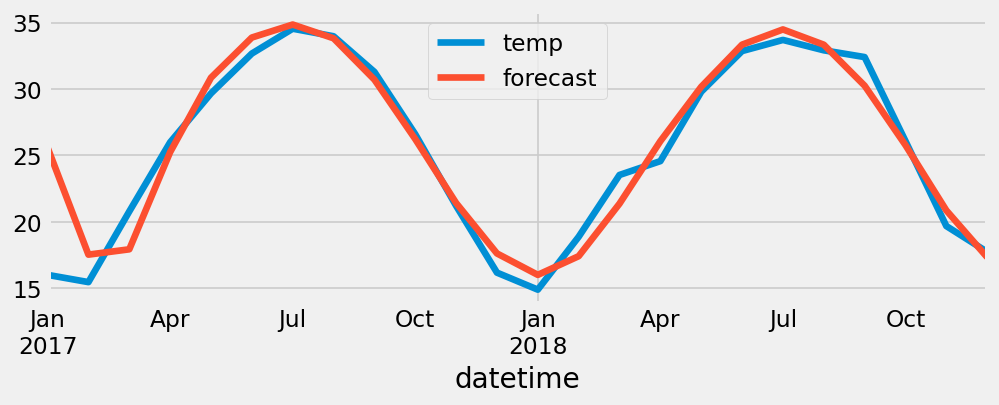

In [167]:
import statsmodels
train_df['forecast'] = model_fit.predict(dynamic=False)
train_df[['temp', 'forecast']].plot();

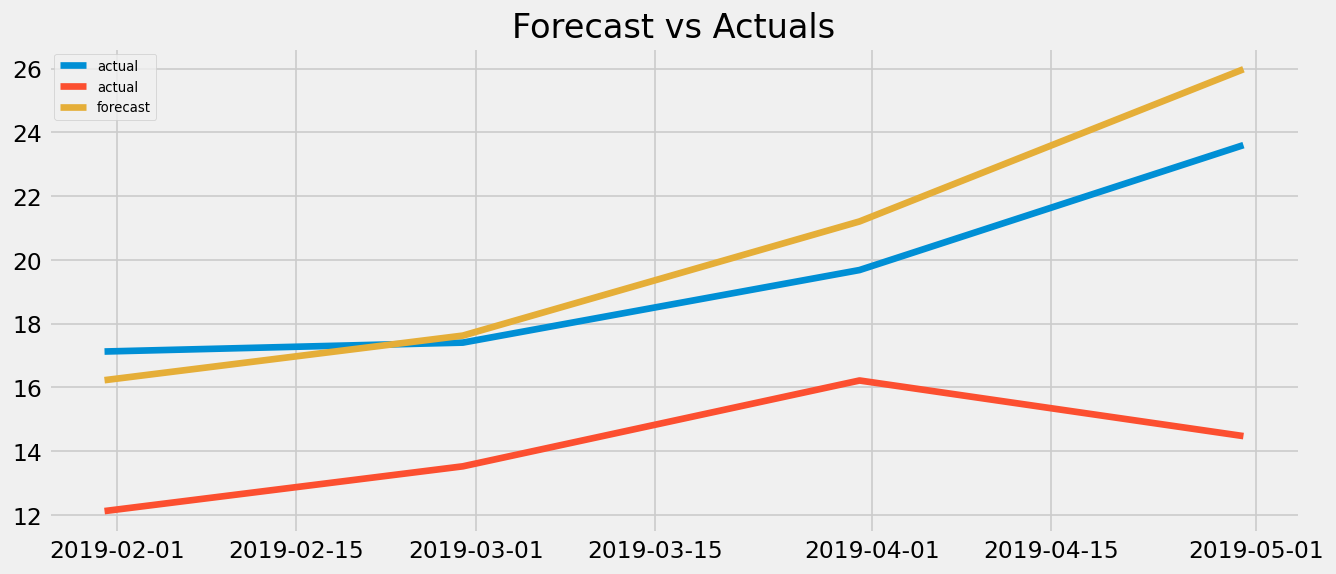

In [211]:
fc=model_fit.forecast(16)
fc_series = pd.Series(fc, index=test_df.index)
plt.figure(figsize=(12,5))
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()